In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

df = pd.read_csv('npadata.csv')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_rows = 999

#firstly, going to remove physicians from the dataset
nps = df[df.degree != 'phys']

#df1 = just country, requirements, duration. includes rows with missing core elements.
df1 = nps[['country', 'requirements', 'degree', 'duration']]

#df2 is df1, but without the missing rows, suitable for analysis for the core program elements

#d1 is the full dataset with ANY of the missing core elements, the rows removed
d1 = nps[(nps.duration.isnull()==False) & (nps.requirements.isnull()==False) & (nps.degree.isnull()==False)].sort_values('country')

#ps is the full dataset, only physicians
ps = df[df.degree == 'phys']


# How to use this

## Read it like a page from top to bottom. Each survey question has its own analysis, beginning with words in bold. 

## Questions about the data set that we still need to address are marked with the hashtag <u><b>#fu</b></u>, just search the page for this.

## Here are the parts of this notebook:

<ul><li> <a href=#unique><b>Unique programs:</b> How many different programs are in the dataset?</a>
    <li> <a href=#requirements><b>Entry requirements:</b> What are the different NPA program entry requirements?</a>
    <li> <a href=#degree><b>Degrees:</b> What degrees are awarded by the NPA programs?</a>
    <li> <a href=#duration><b>Duration:</b> What is the duration of NPA programs?</a>
    <li> <a href=#guidelines><b>Practice guidelines:</b> Are there any institutions that set practice guidelines?</a>
    <li> <a href=#exam><b>Standardized exam:</b> Is there a standardized exam that graduates must pass in order to practice?</a>
    <li> <a href=#tsratio><b>Trainee/student ratio:</b> What is the ratio of trainees to supervisors in the operating room?</a>
    <li> <a href=#curricbyphys><b>Physicians teaching:</b>How much of the curriculum is taught by physicians?</a>
    <li> <a href=#physsuper><b>Physician supervision:</b>How much clinical supervision is done by physicians?</a>
    <li> <a href=#npagrads><b>NPA grads:</b>How many graduates of this NPA program are there each year?</a>
    <li> <a href=#skills><b>Scope of practice:</b>What is the scope of practice of these grads?</a>
    <li> <a href=#modalities><b>Teaching modalities used</b></a>
    <li> <a href=#subspec><b>Subspecialty areas taught</b></a>

# First, let's have a look at the data
Here we have it sorted by country

In [2]:
df1

,country,requirements,degree,duration
0,Benin,Nursing diploma,Master's degree,36.0
1,Botswana,Nursing degree,Diploma,12.0
2,Burundi,Nursing diploma,Diploma,36.0
3,Burkina Faso,Nursing diploma,Diploma,24.0
4,Burkina Faso,Nursing diploma,Diploma,24.0
5,Burundi,Secondary school,Bachelor's degree,48.0
6,Burundi,NaN,Licence,NaN
7,Cameroon,Nursing diploma,Diploma,24.0
8,Cote D'Ivoire,Nursing diploma,Diploma,24.0
9,Chad,NaN,NaN,NaN


It appears there are 127 possible separate programs

# How many have blanks in the core categories of requirements, duration, or degree?

These are the entries with something missing:

In [90]:
missing = df1[(nps['duration'].isnull()==True) | (nps['requirements'].isnull()==True) | (nps['degree'].isnull()==True)].sort_values('country')
missing

,country,requirements,degree,duration
120,Benin,NaN,NaN,NaN
6,Burundi,NaN,Licence,NaN
123,Cabo Verde,NaN,None,NaN
9,Chad,NaN,NaN,NaN
90,Chad,NaN,None,NaN
12,Ethiopia,NaN,Bachelor's degree,NaN
14,Ethiopia,NaN,Bachelor's degree,NaN
17,Gambia,Nursing diploma,Bachelor's degree,NaN
18,Ghana,NaN,NaN,NaN
98,Guinea,NaN,None,NaN


In [4]:
missingnum = missing['country'].count()
print('There are ', missingnum, 'rows with missing core elements')

There are  31 rows with missing core elements


# Therefore, there are 24 entries with missing elements
### Let's drop them from the database, the new database is df2

In [5]:
df2 = df1[(nps.duration.isnull()==False) & (nps.requirements.isnull()==False) & (nps.degree.isnull()==False)].sort_values('country')
print('There are', df2.country.nunique(), 'unique countries in the dataset')

There are 36 unique countries in the dataset


In [6]:
df2.sort_values('country')

,country,requirements,degree,duration
85,Angola,Nursing diploma,Diploma,36.0
0,Benin,Nursing diploma,Master's degree,36.0
87,Benin,Nursing diploma,Master's degree,24.0
78,Benin,Diploma,Diploma,72.0
86,Benin,Nursing diploma,Master's degree,24.0
1,Botswana,Nursing degree,Diploma,12.0
88,Burkina Faso,Nursing diploma,Diploma,24.0
71,Burkina Faso,Nursing degree,Diploma,24.0
4,Burkina Faso,Nursing diploma,Diploma,24.0
3,Burkina Faso,Nursing diploma,Diploma,24.0


### There are 34 countries represented in the final dataset:

In [7]:
df2.country.nunique() # gives number of unique countries

36

# <a name='unique'>Unique programs</a>
### Any degree that has two different durations means we have a duplicate response, and we'll need to sort out which one we trust.
For example, in Benin, the data suggests that you can enter with a nursing diploma, and get a master's degree, with two different program durations.

In [8]:
df2.groupby(['country', 'requirements','degree','duration']).count()

Empty DataFrame
Columns: []
Index: [(Angola, Nursing diploma, Diploma, 36.0), (Benin, Diploma, Diploma, 72.0), (Benin, Nursing diploma, Master's degree, 24.0), (Benin, Nursing diploma, Master's degree, 36.0), (Botswana, Nursing degree, Diploma, 12.0), (Burkina Faso, Nursing degree, Diploma, 24.0), (Burkina Faso, Nursing diploma, Diploma, 24.0), (Burundi, Nursing diploma, Diploma, 36.0), (Burundi, Secondary school, Bachelor's degree, 36.0), (Burundi, Secondary school, Bachelor's degree, 48.0), (Cameroon, Nursing diploma, Diploma, 24.0), (Central African Republic, Nursing diploma, Master's degree, 24.0), (Congo (Brazzaville), Nursing diploma, Assistant sanitaire en anesthésie-réanimation, 24.0), (Cote D'Ivoire, Nursing diploma, Diploma, 24.0), (Cote D'Ivoire, Nursing diploma, Diploma, 36.0), (DRC, Nursing diploma, Diploma, 36.0), (DRC, Provenir d'institut de Technique médicale ou avoir exercé comme infirmier en Anesthésie pendant 2 ans, Diploma, 9.0), (Eritrea, Nursing diploma, Diploma, 36.0), (Ethiopia, Bsc, Master's degree, 24.0), (Ethiopia, Nursing diploma, Bachelor's degree, 48.0), (Ethiopia, Nursing diploma, Certificate, 12.0), (Ethiopia, Secondary school, Bachelor's degree, 48.0), (Gabon, Nursing degree, Certificate, 36.0), (Gabon, Nursing diploma, Master's degree, 36.0), (Ghana, Advanced diploma anesthesia, Bachelor's degree, 24.0), (Ghana, Nursing degree, Bachelor's degree, 24.0), (Ghana, Nursing diploma, Diploma, 24.0), (Kenya, Diploma in clinical medicine, Diploma, 18.0), (Kenya, Nursing degree, I don't know, 24.0), (Kenya, Nursing diploma, Diploma, 18.0), (Liberia, Nursing diploma, Diploma, 24.0), (Liberia, must be a registered nurse by any means/degree:  diploma or university, Diploma, 24.0), (Madagascar, Secondary school, Bachelor's degree, 36.0), (Malawi, Nursing diploma, Diploma, 18.0), (Malawi, Other, Diploma, 36.0), (Malawi, medical assistant certificate, Diploma, 18.0), (Mali, Nursing diploma, Diploma, 2.0), (Mozambique, Nursing diploma, Bachelor's degree, 24.0), (Namibia, Bachelor of Nursing, Diploma, 2.0), (Niger, Nursing diploma, Licence, 36.0), (Niger, Nursing diploma, License, 36.0), (Nigeria, Nursing degree, Certificate, 18.0), (Nigeria, Nursing degree, Diploma, 18.0), (Nigeria, Nursing diploma, Certificate, 24.0), (Nigeria, Nursing diploma, Diploma, 18.0), (Rwanda, Nursing diploma, Bachelor's degree, 48.0), (Rwanda, secondary school, but with specific training on math and sciences, Bachelor's degree, 48.0), (Senegal, Nursing diploma, Diploma, 24.0), (Sierra Leone, Diploma, Diploma, 18.0), (Sierra Leone, Nursing degree, Diploma, 18.0), (Sierra Leone, Nursing diploma, Diploma, 18.0), (Sierra Leone, nursing certificate, State enrolled community health nurse SECHN,, Certificate, 12.0), (Somaliland, Nursing degree, Bachelor's degree, 18.0), (Somaliland, Nursing degree, Bachelor's degree, 24.0), (Somaliland, Nursing diploma, Bachelor's degree, 2.0), (Somaliland, Previously qualified nurse, midwife or pharmacist, Nurse anesthetist', 18.0), (South Africa, Medical school, Diploma, 6.0), (South Sudan, Nursing diploma, Diploma, 24.0), (Sudan, Secondary school, Bachelor's degree, 48.0), (Swaziland, Nursing degree, Bachelor's degree, 24.0), (Tanzania, Assisstant medical officer (general), Diploma, 24.0), (Tanzania, Nursing degree, Certificate, 12.0), (Tanzania, Nursing diploma, Certificate, 12.0), (Tanzania, Nursing diploma, Diploma, 24.0), (Togo, Nursing diploma, Master's degree, 24.0), (Togo, Secondary school, I don't know, 36.0), (Uganda, Nursing diploma, Certificate, 18.0), (Uganda, Nursing diploma, Diploma, 2.5), (Uganda, Nursing diploma, Diploma, 24.0), (Uganda, Nursing diploma, Diploma, 36.0), (Uganda, Other, Diploma, 24.0), (Uganda, diploma in nursing, midwifery or clinical medicine, Advanced Diploma, 24.0), (Uganda, diploma in nursing, midwifery, clinical medicine or advanced diploma in anesthesia, Bachelor's degree, 48.0), (Zambia, Diploma in Clinical Anesthesia, Diploma, 24.0), (Zambia, Diploma in Clinical

## Here's the same thing again, but easier to identify:
### In the 'duration' column, anything >1 means we have to sort out which program we believe to exist.
It is unlikely that two programs have the same entry requirements, and give the same degree, but have two <i>different</i> durations, right?

In [9]:
uniqueprogs = df2.groupby(['country', 'requirements','degree']).nunique()
uniqueprogs

country  \
country                  requirements                                       degree                                                   
Angola                   Nursing diploma                                    Diploma                                              1   
Benin                    Diploma                                            Diploma                                              1   
                         Nursing diploma                                    Master's degree                                      1   
Botswana                 Nursing degree                                     Diploma                                              1   
Burkina Faso             Nursing degree                                     Diploma                                              1   
                         Nursing diploma                                    Diploma                                              1   
Burundi                  Nursing diploma                                    Diploma                                              1   
                         Secondary school                                   Bachelor's degree                                    1   
Cameroon                 Nursing diploma                                    Diploma                                              1   
Central African Republic Nursing diploma                                    Master's degree                                      1   
Congo (Brazzaville)      Nursing diploma                                    Assistant sanitaire en anesthésie-réanimation        1   
Cote D'Ivoire            Nursing diploma                                    Diploma                                              1   
DRC                      Nursing diploma                                    Diploma                                              1   
                         Provenir d'institut de Technique médicale ou av... Diploma                                              1   
Eritrea                  Nursing diploma                                    Diploma                                              1   
Ethiopia                 Bsc                                                Master's degree                                      1   
                         Nursing diploma                                    Bachelor's degree                                    1   
                                                                            Certificate                                          1   
                         Secondary school                                   Bachelor's degree                                    1   
Gabon                    Nursing degree                                     Certificate                                          1   
                         Nursing diploma                                    Master's degree                                      1   
Ghana                    Advanced diploma anesthesia                        Bachelor's degree                                    1   
                         Nursing degree                                     Bachelor's degree                                    1   
                         Nursing diploma                                    Diploma                                              1   
Kenya                    Diploma in clinical medicine                       Diploma                                              1   
                         Nursing degree                                     I don't know                                         1   
                         Nursing diploma                                    Diploma                                              1   
Liberia                  Nursing diploma                                    Diploma                                              1   
                         must be a registered nurse by any means/degree:... Diploma                    

## here is the same thing, except with a total at the bottom. As you can see, there are 68 unique pathways (requirement/degree pairs), but 73 durations... so 10 duplicates we still have to sort out

In [10]:
uniqueprogs.loc['total'] = uniqueprogs.sum()
uniqueprogs

,country,requirements,degree,duration
"(Angola, Nursing diploma, Diploma)",1,1,1,1
"(Benin, Diploma, Diploma)",1,1,1,1
"(Benin, Nursing diploma, Master's degree)",1,1,1,2
"(Botswana, Nursing degree, Diploma)",1,1,1,1
"(Burkina Faso, Nursing degree, Diploma)",1,1,1,1
"(Burkina Faso, Nursing diploma, Diploma)",1,1,1,1
"(Burundi, Nursing diploma, Diploma)",1,1,1,1
"(Burundi, Secondary school, Bachelor's degree)",1,1,1,2
"(Cameroon, Nursing diploma, Diploma)",1,1,1,1
"(Central African Republic, Nursing diploma, Master's degree)",1,1,1,1


# How many NPA programs are in each country?
### response to survey question 'How many NPA programs are in your country?' We didn't ask this in the follow up surveys, I'm inclined to leave it out (especially because it conflicts with itself).

<br>Each represents one survey response... for insance in Burundi, 1 person said there is 1 training program, and 2 people said there were 3 training programs. 

In [11]:
npapgms = nps[['country', 'npaprograms']]
pd.crosstab(npapgms['country'], npapgms['npaprograms'])

npaprograms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,17.0,19.0,31.0,500.0
country,,,,,,,,,,,,,,
Angola,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Benin,0,4,0,0,0,0,0,0,0,0,0,0,0,0
Botswana,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Burkina Faso,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Burundi,0,1,0,3,0,0,0,0,0,0,0,0,0,0
Cameroon,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Congo (Brazzaville),0,1,0,0,0,0,0,0,0,0,0,0,0,0
Cote D'Ivoire,0,2,0,0,0,0,0,0,0,0,0,0,0,0
DRC,0,1,1,0,0,0,0,0,0,0,0,0,0,0


# <u> <a name='requirements'>Entry requirements</a> </u>

### It appears that, by far, most programs are nursing diploma entry. From quick googling, even a nursing diploma is often 3 years long.

> ### for data cleaning, we need to consolidate these into fewer categories. #fu

In [12]:
reqs = df2.requirements.value_counts()
reqspct = df2.requirements.value_counts(normalize=True)

In [13]:
reqstab = pd.concat([reqs, reqspct], axis=1)
reqstab

,requirements,requirements
Nursing diploma,48,0.527473
Nursing degree,14,0.153846
Secondary school,9,0.098901
Other,2,0.021978
Diploma,2,0.021978
Provenir d'institut de Technique médicale ou avoir exercé comme infirmier en Anesthésie pendant 2 ans,1,0.010989
Bachelor of Nursing,1,0.010989
"diploma in nursing, midwifery or clinical medicine",1,0.010989
"diploma in nursing, midwifery, clinical medicine or advanced diploma in anesthesia",1,0.010989
"nursing certificate, State enrolled community health nurse SECHN,",1,0.010989


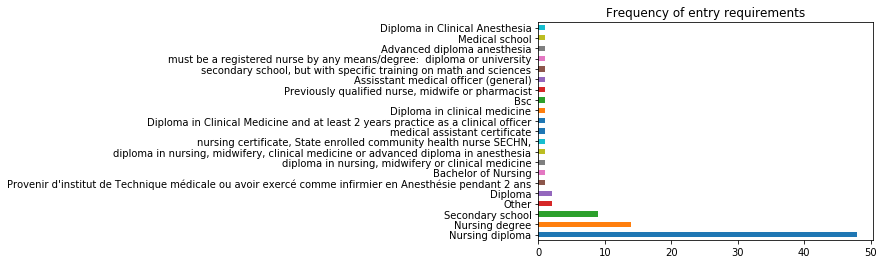

In [14]:
reqs.plot.barh(title='Frequency of entry requirements')

# <u> <a name='degree'>Degrees awarded </u></a>
### Again, it appears that diplomas are far more likely to be awarded.
> ### We need to collapse these down into fewer categories as well #fu

In [15]:
degs = df2['degree'].value_counts()
degspct = df2['degree'].value_counts(normalize=True)
degstab = pd.concat([degs, degspct], axis=1)
degstab.columns = ('count', 'percent')
degstab

,count,percent
Diploma,48,0.527473
Bachelor's degree,18,0.197802
Certificate,9,0.098901
Master's degree,7,0.076923
Licence,3,0.032967
I don't know,2,0.021978
License,1,0.010989
Nurse anesthetist',1,0.010989
Assistant sanitaire en anesthésie-réanimation,1,0.010989
Advanced Diploma,1,0.010989


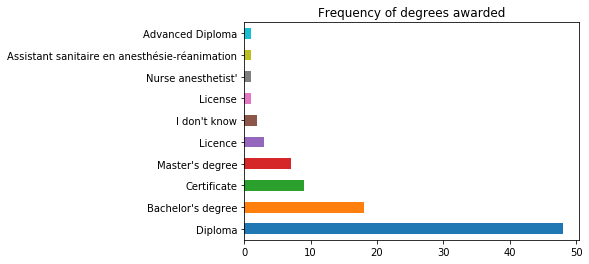

In [16]:
degs.plot.barh(title="Frequency of degrees awarded")
#sb.barplot(data=degs)

# <u><a name='duration'>Duration </u></a>

## Duration by program

## 75% of programs are 36 months or less

With a mean duration of 26 months.

In [17]:
df1.describe()

,duration
count,93.000000
mean,25.413978
std,12.436496
min,2.000000
25%,18.000000
50%,24.000000
75%,36.000000
max,72.000000


Text(0.5,1,'Mean, median, IQR, and range of duration')

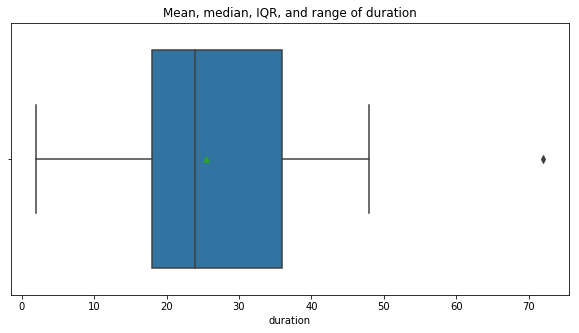

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(x=df1['duration'], showmeans=True).set_title("Mean, median, IQR, and range of duration")

### The next three figures show that most programs are 30 months or less

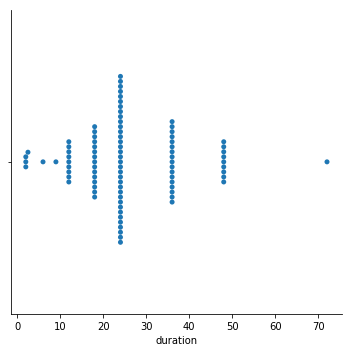

In [53]:
sb.catplot(x='duration', data=d1, kind='swarm')

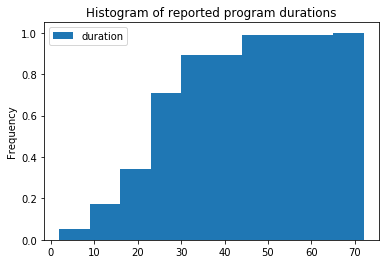

In [20]:
df1.plot.hist(density=True, cumulative=True, title="Histogram of reported program durations")

/srv/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Histogram of reported program durations')

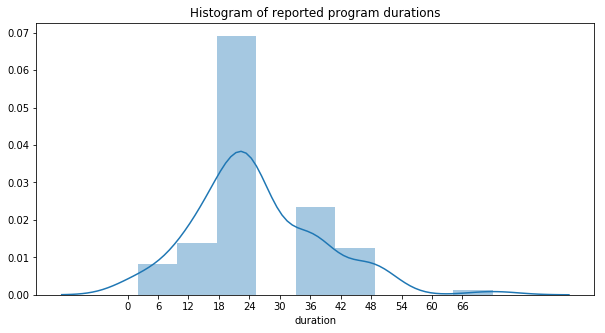

In [21]:
#df1['duration'].plot.hist(cumulative=True, title="Cumulative proportion of program durations")
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xticks(range(0,70,6))
sb.distplot(df1['duration'].dropna()).set_title('Histogram of reported program durations')

## Bachelors/License have the highest mean duration of training, at 36 months. 

> ### why does bachelors have a higher mean duration than bachelors? #fu

In [22]:
durdegree = df1.groupby('degree').mean().sort_values('duration')
durdegree

,duration
degree,
Certificate,17.333333
Nurse anesthetist',18.000000
Diploma,22.322917
Advanced Diploma,24.000000
Assistant sanitaire en anesthésie-réanimation,24.000000
I don't know,24.000000
Master's degree,27.428571
Bachelor's degree,35.777778
Licence,36.000000


## But no trends can be drawn

The data is too sparse to draw a conclusion

Text(0.5,1,'Duration of training by degree given')

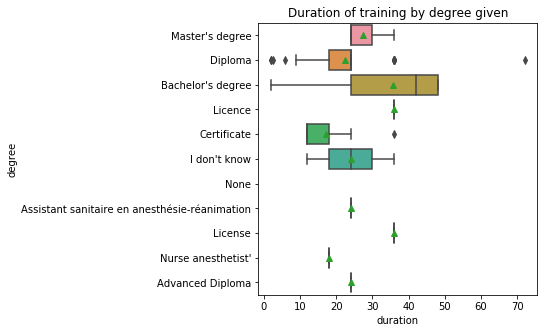

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
sb.boxplot(ax=ax, x=df1['duration'], y=df1['degree'], showmeans=True).set_title("Duration of training by degree given")

Text(0.5,1,'Mean duration of training, by degree given')

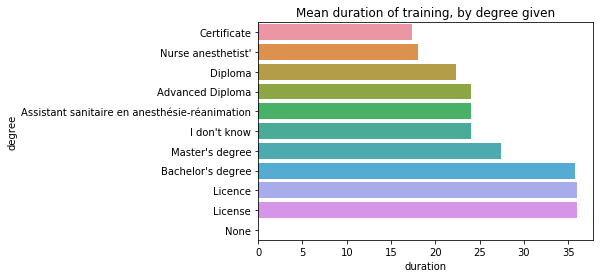

In [24]:
#durdegree.plot.bar(title="Duration of training by degree awarded")
sb.barplot(data=durdegree, x='duration', y=durdegree.index).set_title("Mean duration of training, by degree given")

# <a name='guidelines'>Survey question: "Is there an association that sets practice guidelines in your country?"</a>

### There is some conflicting information, but mostly respondents from a certain country agree with themselves

In [60]:
guideline = pd.crosstab(nps['country'],nps['practice-guideline-org'])
guideline.loc['total'] = guideline.sum()
guideline

practice-guideline-org,I don't know,No,Yes
country,,,
Angola,0,1,0
Benin,0,0,3
Burkina Faso,0,1,0
Burundi,0,1,0
Cameroon,0,0,1
Central African Republic,0,1,0
Congo (Brazzaville),0,1,0
Cote D'Ivoire,0,1,0
DRC,0,1,0


In [26]:
def f(row):
    if row['Yes'] >= 1:
        val = 'Yes'
    elif row['No'] >= 1:
        val = 'No'
    else:
        val = 'I do not know'
    return val

guideline['Practice guideline'] = guideline.apply(f, axis=1)
guideline = guideline['Practice guideline']
guideline = guideline.drop(guideline.index[-1])

## Assume that if <i>anyone</i> in the country says 'yes', then it's true
<br> That leaves us with 46% of countries saying 'yes, there is an association that sets guidelines'

In [27]:
guideline.value_counts(normalize=True)

No     0.6
Yes    0.4
Name: Practice guideline, dtype: float64

# <a name='exam'>Survey question: "Is there a standardized exam that must be taken before they can practice?"</a>

## again, there seems to be some internal disagreement where different respondents from the same country don't agree

In [61]:
stdexam = pd.crosstab(nps['country'], nps['standardizedexam'])
stdexam

standardizedexam,I don't know,No,Yes
country,,,
Angola,0,0,1
Benin,0,1,2
Burkina Faso,0,0,1
Burundi,0,1,0
Cameroon,0,0,1
Central African Republic,0,1,0
Congo (Brazzaville),0,1,0
Cote D'Ivoire,0,1,0
DRC,0,1,0


## Using the same method where if ANYONE in the country says yes it = yes, then 54% say they have a standardized exam that must be passed.

In [29]:
def f(row):
    if row['Yes'] >= 1:
        val = 'Yes'
    elif row['No'] >= 1:
        val = 'No'
    else:
        val = 'I do not know'
    return val

stdexam['Standardized exam'] = stdexam.apply(f, axis=1)
stdexam = stdexam['Standardized exam']
stdexam.value_counts(normalize=True)

No     0.5
Yes    0.5
Name: Standardized exam, dtype: float64

# <a name='tsratio'>What is the ratio of trainees to supervisors (in the operating room?)</a>

## Mean trainee supervisor ratio

The mean number of trainees per supervisor in the OR is 2.85, but with a wide standard deviation.

Conclusion: I'm not sure what to report about this, because I feel it is a fairly gross under representation. I think this might be a the number of trainees <i>per cadre</i> meaning, that a supervisor might have 2 MMeds, 2 NPAs, and others.

In [62]:
nps['trainee-supervisor'].describe()

count    37.000000
mean      3.685504
std       3.440218
min       0.363636
25%       2.000000
50%       2.000000
75%       4.000000
max      15.000000
Name: trainee-supervisor, dtype: float64

Text(0.5,1,'Distribution of trainee supervisor ratios')

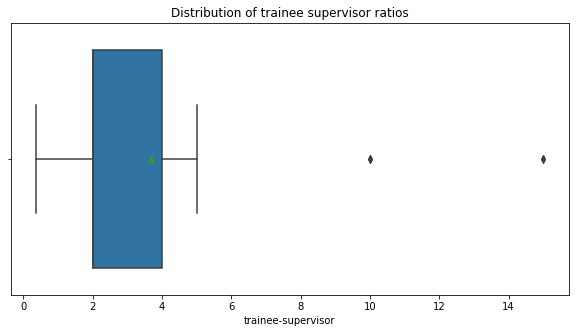

In [63]:
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(nps['trainee-supervisor'], showmeans=True).set_title("Distribution of trainee supervisor ratios")

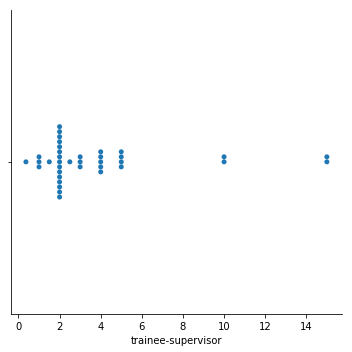

In [64]:
sb.catplot(x='trainee-supervisor', data=nps, kind="swarm", height=5)

/srv/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Histogram of trainee supervisor ratios')

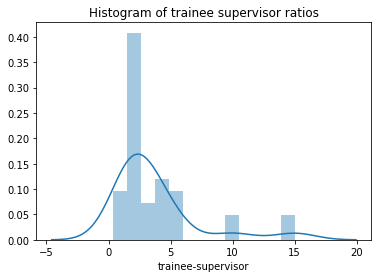

In [65]:
sb.distplot(nps['trainee-supervisor'].dropna()).set_title('Histogram of trainee supervisor ratios')

## Trainee ratio by degree awarded

Too hard to tell, too much distribution.

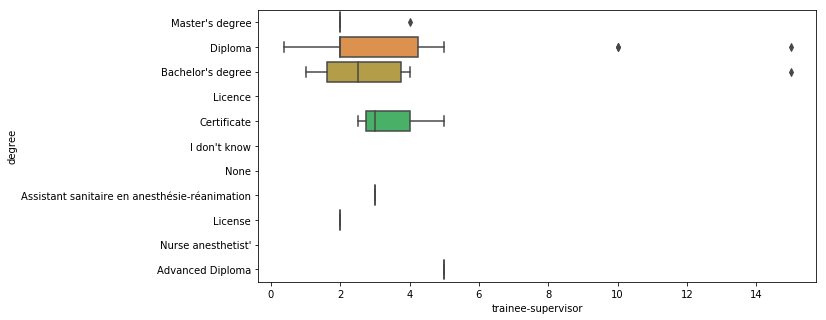

In [66]:
fig, ax = plt.subplots(figsize=(10,5))
sb.boxplot(x=nps['trainee-supervisor'], y=nps['degree'])

## Is there an association between program duration and supervisor ratio?

Doesn't look like much to me!

/srv/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


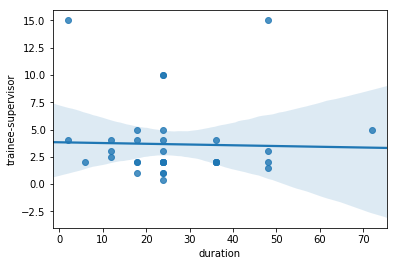

In [67]:
sb.regplot(x='duration', y='trainee-supervisor', data=nps, fit_reg=True)

# <a name='curricbyphys'>How much of the curriculum is taught by physicians?</a>

## Physicians seem to be heavily involved in almost half the programs

In [112]:
# First, let's merge the categories 0 and 1-50, into <50%

dfcurrphys = nps.replace('0%', '<50%', regex=False)
dfcurrphys = dfcurrphys.replace('1-50%', '<50%', regex=False)
dfcurrphys['curriculum_physicians'].value_counts(normalize=True)

<50%    0.56044
>50%    0.43956
Name: curriculum_physicians, dtype: float64

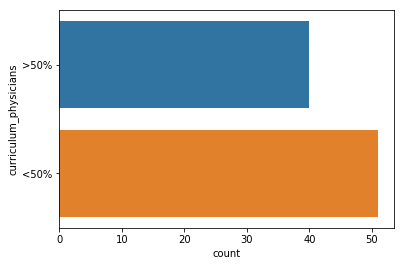

In [114]:
sb.countplot(y='curriculum_physicians', data=dfcurrphys)

## Are physicians involved in some degrees, and not others?

Perhaps more involved with Master's degrees, but not bachelors?

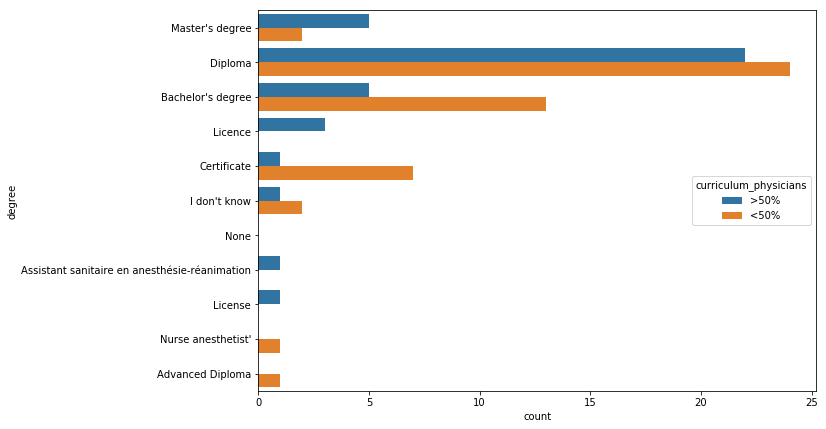

In [125]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(hue='curriculum_physicians', y='degree', data=dfcurrphys)

# <a name='physsuper'>How much clinical supervision is done by physicians?</a>

There are these many unique observations:

In [39]:
d1['super_byphys'].describe()

count        28
unique        3
top       1-50%
freq         20
Name: super_byphys, dtype: object

In [40]:
d1['super_byphys'].value_counts(normalize=True)

1-50%    0.714286
>50%     0.178571
0%       0.107143
Name: super_byphys, dtype: float64

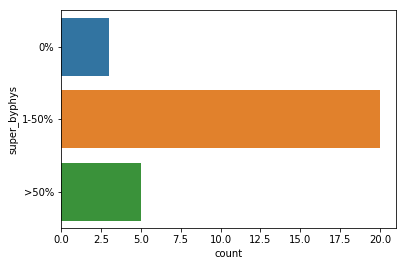

In [41]:
sb.countplot(y='super_byphys', data=d1, order=['0%','1-50%','>50%'])

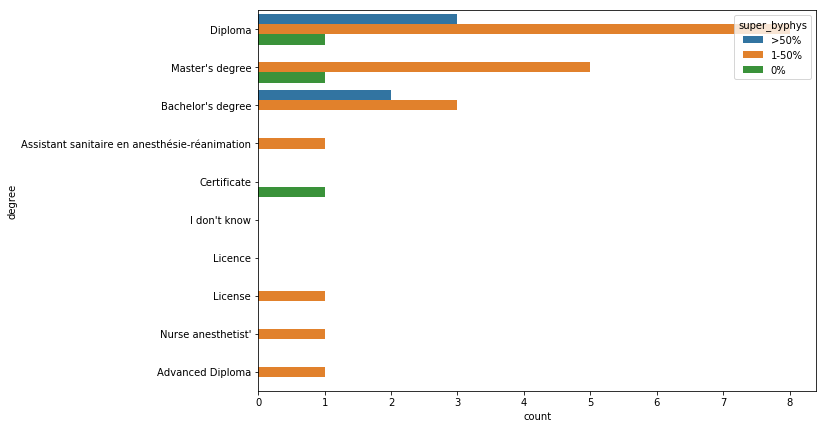

In [42]:
fig, ax = plt.subplots(figsize=(10,7))
sb.countplot(hue='super_byphys', y='degree', data=d1)

# <a name='npagrads'>How many graduates of this NPA program are there each year?</a>

In [43]:
d1['npagrads'].describe()

count     80.000000
mean      45.200000
std       88.894106
min        0.000000
25%       10.000000
50%       20.000000
75%       40.000000
max      700.000000
Name: npagrads, dtype: float64

The standard deviation is 90!!

In [44]:
print('the 95th percentile is :', d1['npagrads'].quantile(0.95))#the distribution is too huge, let's only take the 95% percentile and get rid of those crazy outliers

the 95th percentile is : 161.9999999999999


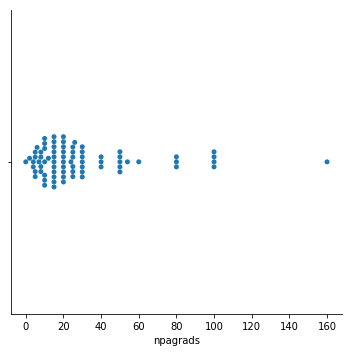

In [45]:
npachopped = d1[d1['npagrads'] <= 168]
sb.catplot(x='npagrads', data=npachopped, kind='swarm')

/srv/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Histogram of NPA grads in country')

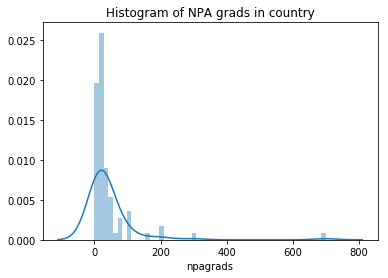

In [56]:
sb.distplot(d1['npagrads'].dropna()).set_title('Histogram of NPA grads in country')

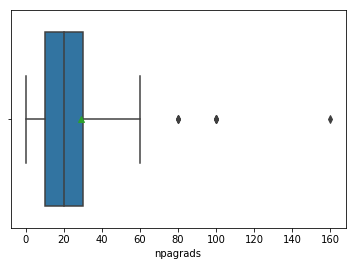

In [46]:
sb.boxplot(npachopped['npagrads'], showmeans=True)

## Are the number of graduates related to the duration of training?

Not really.

/srv/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


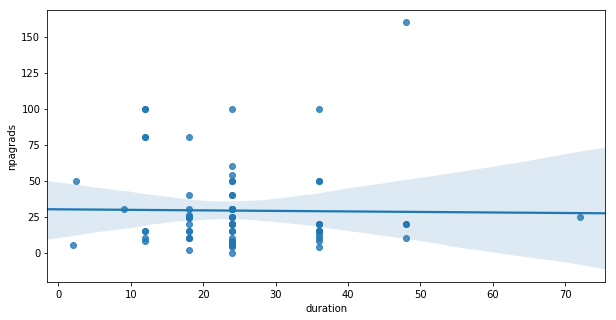

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
sb.regplot(x='duration', y='npagrads', data=npachopped)

## Is there concordance between the number of grads reported for each unique degree program?

In [48]:
npgds = d1[['country', 'requirements','degree','npagrads']]
npgds.groupby(['country', 'requirements','degree','npagrads']).count()

Empty DataFrame
Columns: []
Index: [(Angola, Nursing diploma, Diploma, 4.0), (Benin, Diploma, Diploma, 25.0), (Benin, Nursing diploma, Master's degree, 15.0), (Benin, Nursing diploma, Master's degree, 20.0), (Botswana, Nursing degree, Diploma, 8.0), (Burkina Faso, Nursing degree, Diploma, 30.0), (Burkina Faso, Nursing diploma, Diploma, 30.0), (Burkina Faso, Nursing diploma, Diploma, 50.0), (Burundi, Nursing diploma, Diploma, 50.0), (Burundi, Secondary school, Bachelor's degree, 10.0), (Burundi, Secondary school, Bachelor's degree, 100.0), (Cameroon, Nursing diploma, Diploma, 30.0), (Congo (Brazzaville), Nursing diploma, Assistant sanitaire en anesthésie-réanimation, 20.0), (Cote D'Ivoire, Nursing diploma, Diploma, 15.0), (Cote D'Ivoire, Nursing diploma, Diploma, 25.0), (DRC, Nursing diploma, Diploma, 12.0), (DRC, Provenir d'institut de Technique médicale ou avoir exercé comme infirmier en Anesthésie pendant 2 ans, Diploma, 30.0), (Ethiopia, Bsc, Master's degree, 25.0), (Ethiopia, Nursing diploma, Bachelor's degree, 200.0), (Ethiopia, Nursing diploma, Certificate, 80.0), (Ethiopia, Secondary school, Bachelor's degree, 160.0), (Ethiopia, Secondary school, Bachelor's degree, 200.0), (Ethiopia, Secondary school, Bachelor's degree, 300.0), (Gabon, Nursing diploma, Master's degree, 8.0), (Ghana, Advanced diploma anesthesia, Bachelor's degree, 25.0), (Ghana, Nursing diploma, Diploma, 100.0), (Kenya, Diploma in clinical medicine, Diploma, 26.0), (Kenya, Nursing degree, I don't know, 50.0), (Kenya, Nursing diploma, Diploma, 25.0), (Kenya, Nursing diploma, Diploma, 30.0), (Liberia, Nursing diploma, Diploma, 5.0), (Liberia, must be a registered nurse by any means/degree:  diploma or university, Diploma, 6.0), (Madagascar, Secondary school, Bachelor's degree, 20.0), (Malawi, Nursing diploma, Diploma, 25.0), (Malawi, Other, Diploma, 15.0), (Malawi, medical assistant certificate, Diploma, 24.0), (Mozambique, Nursing diploma, Bachelor's degree, 40.0), (Niger, Nursing diploma, Licence, 15.0), (Niger, Nursing diploma, License, 10.0), (Nigeria, Nursing degree, Certificate, 10.0), (Nigeria, Nursing degree, Diploma, 40.0), (Nigeria, Nursing diploma, Certificate, 20.0), (Nigeria, Nursing diploma, Diploma, 80.0), (Rwanda, Nursing diploma, Bachelor's degree, 20.0), (Senegal, Nursing diploma, Diploma, 20.0), (Sierra Leone, Diploma, Diploma, 15.0), (Sierra Leone, Nursing degree, Diploma, 10.0), (Sierra Leone, Nursing diploma, Diploma, 15.0), (Sierra Leone, nursing certificate, State enrolled community health nurse SECHN,, Certificate, 15.0), (Somaliland, Nursing degree, Bachelor's degree, 2.0), (Somaliland, Nursing degree, Bachelor's degree, 5.0), (Somaliland, Nursing diploma, Bachelor's degree, 5.0), (Somaliland, Previously qualified nurse, midwife or pharmacist, Nurse anesthetist', 10.0), (South Sudan, Nursing diploma, Diploma, 0.0), (Sudan, Secondary school, Bachelor's degree, 700.0), (Swaziland, Nursing degree, Bachelor's degree, 5.0), (Tanzania, Assisstant medical officer (general), Diploma, 4.0), (Tanzania, Nursing degree, Certificate, 80.0), (Tanzania, Nursing degree, Certificate, 100.0), (Tanzania, Nursing diploma, Certificate, 100.0), (Tanzania, Nursing diploma, Diploma, 30.0), (Togo, Nursing diploma, Master's degree, 8.0), (Togo, Secondary school, I don't know, 20.0), (Uganda, Nursing diploma, Certificate, 20.0), (Uganda, Nursing diploma, Diploma, 20.0), (Uganda, Nursing diploma, Diploma, 50.0), (Uganda, Other, Diploma, 60.0), (Uganda, diploma in nursing, midwifery or clinical medicine, Advanced Diploma, 40.0), (Uganda, diploma in nursing, midwifery, clinical medicine or advanced diploma in anesthesia, Bachelor's degree, 20.0), (Zambia, Diploma in Clinical Anesthesia, Diploma, 8.0), (Zambia, Diploma in Clinical Medicine and at least 2 years practice as a clinical officer, Diploma, 7.0), (Zambia, Nursing diploma, Diploma, 54.0), (Zambia, Secondary school, Diploma, 10.0), (Zimbabwe, Nursing degree, Diploma, 15.0), (Zimbabwe, Nursing diploma, D

# <a name='skills'>Skills</a>

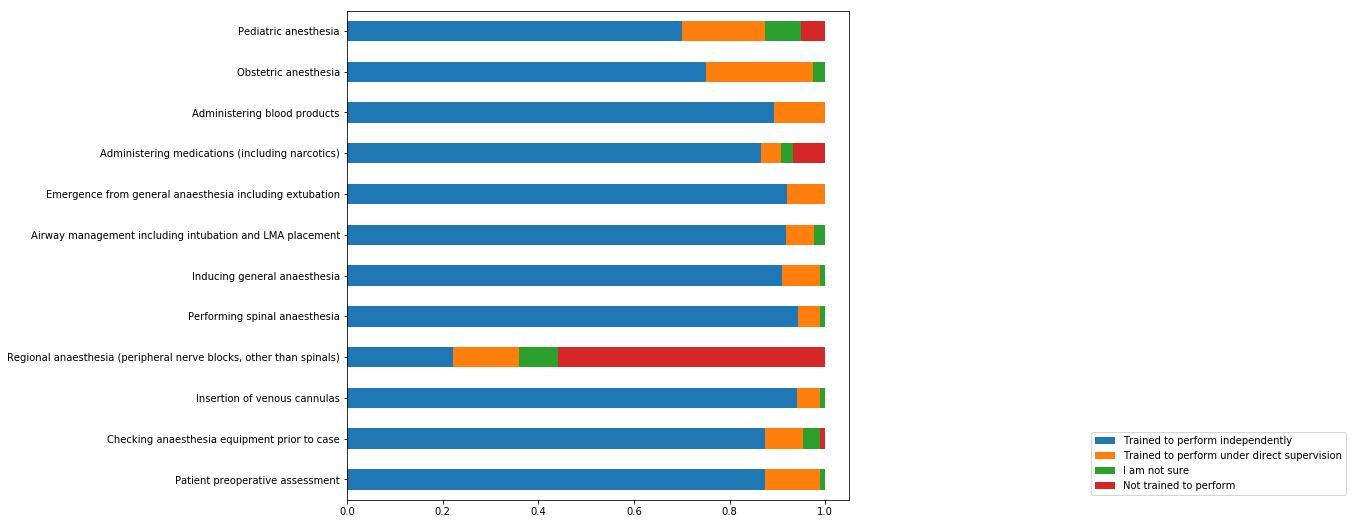

In [58]:
sklz = d1.iloc[:,21:33] #select only the skills columns from the whole dataframe
skills = pd.concat([df1, sklz], axis=1) # join them with degrees, country, etc

# recode some answers that are the same
skills = skills.replace('Yes, trained to perform independently', 'Trained to perform independently', regex=True)
skills = skills.replace('Trained to perform with.+', 'Trained to perform under direct supervision', regex=True)


# now create a series for each one in percent
s1 = skills['Patient preoperative assessment'].value_counts(normalize=True)
s2 = skills['Checking anaesthesia equipment prior to case'].value_counts(normalize=True)
s3 = skills['Insertion of venous cannulas'].value_counts(normalize=True)
s4 = skills['Regional anaesthesia (peripheral nerve blocks, other than spinals)'].value_counts(normalize=True)
s5 = skills['Performing spinal anaesthesia'].value_counts(normalize=True)
s6 = skills['Inducing general anaesthesia'].value_counts(normalize=True)
s7 = skills['Airway management including intubation and LMA placement'].value_counts(normalize=True)
s8 = skills['Emergence from general anaesthesia including extubation'].value_counts(normalize=True)
s9 = skills['Administering medications (including narcotics)'].value_counts(normalize=True)
s10 = skills['Administering blood products'].value_counts(normalize=True)
s11 = skills['Obstetric anesthesia'].value_counts(normalize=True)
s12 = skills['Pediatric anesthesia'].value_counts(normalize=True)

# glue all the series together into one long dataframe sx
sx = pd.concat([s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12], axis=1, sort=False)

#plot the figure
fig, ax = plt.subplots(figsize=(9,9))
sx.T.plot(ax=ax, kind='barh', stacked=True).legend(loc='lower right', bbox_to_anchor=(2,0), ncol=1)

# <a name='modalities'>Teaching modalities used</a>

# <a name='subspec'>Subspecialty areas taught</a>

# Physician analysis (tbd)

Mean # of physicians working per country

In [50]:
pswrk = df.groupby('country').mean().sort_values('physicians_working')
psgraph = pswrk.loc[:,['physicians_working']]
psgraph

,physicians_working
country,
Somalia,0.000000
South Sudan,2.000000
Liberia,2.000000
Gambia,2.000000
Sierra Leone,4.000000
Burundi,5.250000
Swaziland,6.000000
Malawi,6.666667
Chad,8.000000


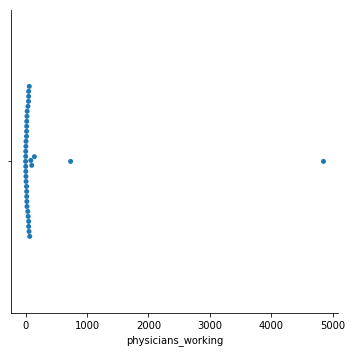

In [51]:
sb.catplot(x='physicians_working', data=psgraph, kind='swarm')